# **Equipo 2**

## **Proyecto: Cancer de mama en México**

#### Integrantes:
- Zoé Ariel García Martínez
- Atenea De La Cruz Brito
- Juan Luis Carrillo de la Cruz

### Pregunta 1

#### ¿Cómo ha sido el crecimiento en la incidencia del cáncer de mama?

Con el objetivo de analizar este problema con más detalle, se propone realizar el análisis de los dataset (DS) ```DATA_SICAM``` y ```Morbilidad_2013_2019```, previamente analizados y ya listo para gráficas y análisis estadísticos. donde se puede obtener información acerca de mastografías, así como las entidades donde se han registrado los diagnósticos y los grupos de edad en los que se presenta, además de la morbilidad por entidad federativa. Además, se intentara buscar si existe alguna relación entre el número de mastografías realizadas con la incidencia de cáncer de mama.

Fuentes de información:

[INEGI (2020) ESTADÍSTICAS A PROPÓSITO DEL DÍA MUNDIAL DE LA LUCHA CONTRA EL CÁNCER DE MAMA (19 DE OCTUBRE).](https://www.inegi.org.mx/contenidos/saladeprensa/aproposito/2020/Cancermama20.pdf)

[INEGI (2021) ESTADÍSTICAS A PROPÓSITO DEL DÍA MUNDIAL CONTRA EL CÁNCER (4 DE FEBRERO).](https://www.inegi.org.mx/contenidos/saladeprensa/aproposito/2021/cancer2021_Nal.pdf)

Los DS se analizarán siguiendo el flujo de trabajo presentado a continuación...

In [1]:
# Importamos las librerias y obtenemos 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from scipy.stats import skew, kurtosis
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
import seaborn  as sns
import folium
import geopandas as gpd
sns.set(style='whitegrid')

In [2]:
sicam13_estado = pd.read_csv("../Equipo_2_P2_Analisis/DATA_CLEAN/SICAM/masto_2013_SICAM_estado.csv", index_col=0)
sicam13_estado.head()

,resultado,estado,count
0,Altamente Sugestiva a Malignidad,Aguascalientes,31
1,Altamente Sugestiva a Malignidad,Baja California,31
2,Altamente Sugestiva a Malignidad,Baja California Sur,2
3,Altamente Sugestiva a Malignidad,Campeche,25
4,Altamente Sugestiva a Malignidad,Chiapas,1


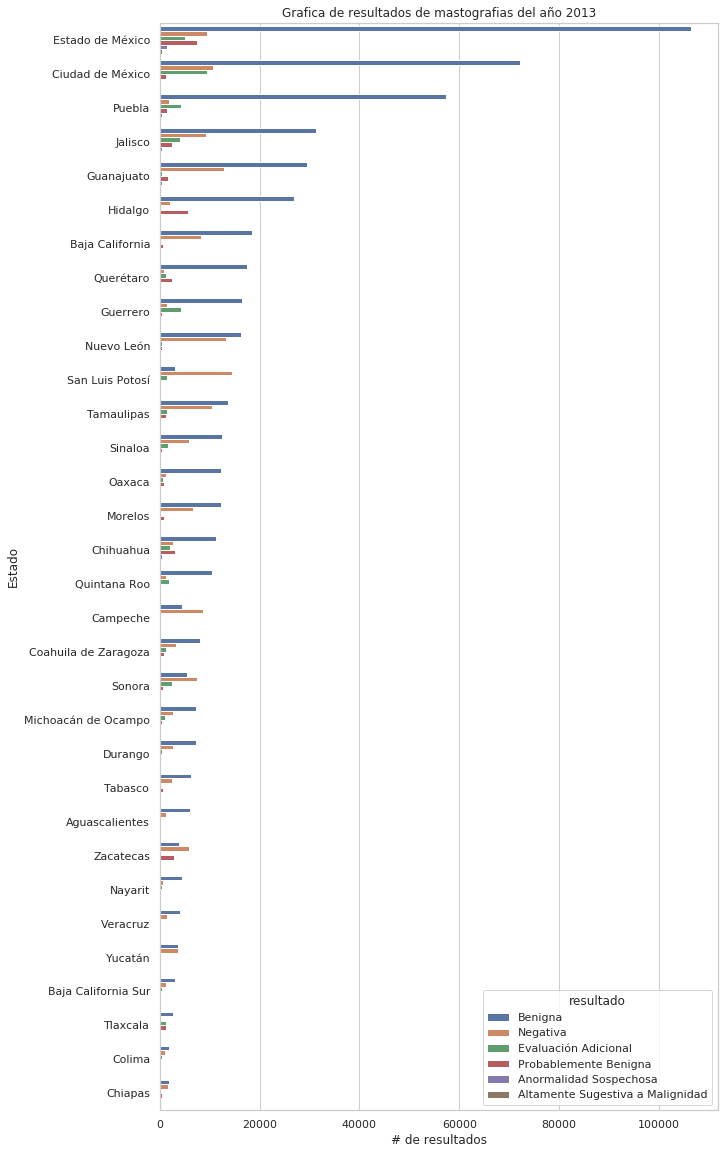

In [3]:
# Graficas de barras
fig = plt.figure(figsize=(10,20))
ax = sns.barplot(x='count', y='estado', data=sicam13_estado.sort_values(by='count', ascending=False), orient='h', hue='resultado') #dodge = false
ax.set_title('Grafica de resultados de mastografias del año 2013')
ax.set(xlabel='# de resultados', ylabel='Estado');

Ya que la grafica de barras nos indica una gran diferencia entre el número de mastografías presetadas en los diferentes estados, consideramos que la mejor manera de presentar este tipo de datos es usando mapas. 

In [3]:
# cargamos el geojson con la geometria de los estados de México
mexico = '../Equipo_2_P2_Analisis/DATA/mexico.json'
fname = mexico
mxn = gpd.read_file(fname)
mxn = mxn[1:][['name', 'geometry']]
mxn = mxn.rename(columns= {'name': 'estado'})
mxn

,estado,geometry
1,Baja California,"MULTIPOLYGON (((-114.14750 28.00015, -114.2070..."
2,Baja California Sur,"MULTIPOLYGON (((-109.79843 24.15516, -109.8624..."
3,Coahuila,"POLYGON ((-99.80696 27.77142, -99.96720 27.640..."
4,Chihuahua,"POLYGON ((-106.50605 31.77026, -106.42895 31.7..."
5,Durango,"POLYGON ((-103.62726 26.64393, -103.32570 26.4..."
6,Sinaloa,"MULTIPOLYGON (((-108.88272 25.44318, -108.8188..."
7,Sonora,"MULTIPOLYGON (((-109.23137 26.26342, -109.2254..."
8,Zacatecas,"POLYGON ((-100.82844 24.56496, -100.86968 24.4..."
9,Nuevo León,"POLYGON ((-99.80696 27.77142, -99.74044 27.722..."
10,San Luis Potosí,"POLYGON ((-100.05727 23.24106, -100.08926 23.1..."


In [4]:
# realizamos la funcion de un mapa multicapa

def map_mul(jsn, data, var, count,  location, zoom, title='Titulo', res='Resultados'):
    '''
    Funcion que entrega un "Choropleth map" multicapa,
    útil para realizar mapas de diferentes variables
    en un mimso data set. Es necesario tener un geojson
    con los valores a usar (e.j. poligonos)
    
    jsn: geojson que contiene los valores espaciales
    data: Dataframe de los datos
    var: variable que queremos localizer
    count: conteo de los datos de la variable a usar
    title: titulo.
    res: Titulo de los resultados.
    location: centro del mapa [y,x]
    zoom: zoom de la capa
    
    Nota: por el momento solo funciona con geojson usado en 
    clase, falta poder dar las propiedad de forma correcta 
    en la variable 'key_on' de folium.Choropleth
    '''
    
    # Usamos un array con los nombres de las variables para el loop que preparara el mapa
    res = pd.unique(data[var])
    
    # usando folium realizamos el mapa con diferentes capas
    mymap =  folium.Map(location=location, zoom_start=zoom, width="100%", height='100%')
    for i in range(0,len(res)):
        folium.Choropleth(
            geo_data = jsn,
            name=f'{title} {res[i]}',
            data=data[data[var]  == res[i]],
            columns=[var, count],
            key_on='feature.properties.estado',
            fill_color='YlGn',
            fill_opacity=0.7,
            line_opacity=0.2,
            legend_name=f'{res} {res[i]}'
        ).add_to(mymap)
        
    folium.LayerControl().add_to(mymap)
    
    return mymap


# Intente realizar la funcion y arroja el mapa, pero no imprime nada a pesar de darme el bjeto de folium.

In [5]:
# renombramos los datos y los preparamos para el mapa
renombre = {
    'Coahuila de Zaragoza': 'Coahuila',
    'Ciudad de México': 'Distrito Federal',
    'Michoacán de Ocampo': 'Michoacán',
    'Veracruz de Ignacio de la Llave': 'Veracruz',
    'Estado de México': 'México'
}

sicam13_estado = sicam13_estado.replace({"estado": renombre})

In [7]:
# Usamos un array con los nombres de las variables para el loop que preparara el mapa
res = pd.unique(sicam13_estado['resultado'])

# usando folium realizamos el mapa con diferentes capas
mymap =  folium.Map(location=[25, -100], zoom_start=4.4, width="100%", height='100%')

for i in range(0,len(res)):
    folium.Choropleth(
        geo_data = mxn,
        name=f'Resultados mastografias {res[i]}',
        data=sicam13_estado[sicam13_estado['resultado']  == res[i]],
        columns=['estado', 'count'],
        key_on='feature.properties.estado',
        fill_color='YlGn',
        fill_opacity=0.7,
        line_opacity=0.2,
        legend_name=f'Resultados mastografias {res[i]}'
    ).add_to(mymap)

folium.LayerControl().add_to(mymap)

mymap

El mapa anterior nos ayuda a visualizar de forma interactiva el total de mastografías realizadas dependiendo de sus resultados. La navegación es simple, el mapa presenta diferentes capas que se pueden encender y apagar y de esta forma ver los estados tienen una mayor o un menor numero de tumores benignos, por poner un ejemplo. 

## Análisis para todo México

A continuación presentamos nuestro DS del SICAM para el rango de años entre el 2013-2019, donde haremos un dataframe con los resultados.

In [11]:
# Cargamos los DS para cada año

# 2014
sicam14_estado = pd.read_csv("../Equipo_2_P2_Analisis/DATA_CLEAN/SICAM/masto_2014_SICAM_estado.csv", index_col=0)
sicam14_estado = sicam14_estado.replace({"estado": renombre})

# 2015
sicam15_estado = pd.read_csv("../Equipo_2_P2_Analisis/DATA_CLEAN/SICAM/masto_2015_SICAM_estado.csv", index_col=0)
sicam15_estado = sicam15_estado.replace({"estado": renombre})

# 2016
sicam16_estado = pd.read_csv("../Equipo_2_P2_Analisis/DATA_CLEAN/SICAM/masto_2016_SICAM_estado.csv", index_col=0)
sicam16_estado = sicam16_estado.replace({"estado": renombre})

# 2017
sicam17_estado = pd.read_csv("../Equipo_2_P2_Analisis/DATA_CLEAN/SICAM/masto_2017_SICAM_estado.csv", index_col=0)
sicam17_estado = sicam17_estado.replace({"estado": renombre})

# 2019
sicam19_estado = pd.read_csv("../Equipo_2_P2_Analisis/DATA_CLEAN/SICAM/masto_2019_SICAM_estado.csv", index_col=0)
sicam19_estado = sicam19_estado.replace({"estado": renombre})

In [15]:
# Hacems un DF con todos los datos
masto = sicam13_estado.append([sicam14_estado, sicam15_estado, sicam16_estado, sicam17_estado, sicam19_estado]).reset_index(drop=True)
masto.tail()

,resultado,estado,count
1443,Riesgo Moderado de Malignidad,Tabasco,4
1444,Riesgo Moderado de Malignidad,Tamaulipas,19
1445,Riesgo Moderado de Malignidad,Tlaxcala,1
1446,Riesgo Moderado de Malignidad,Yucatán,2
1447,Riesgo Moderado de Malignidad,Zacatecas,9


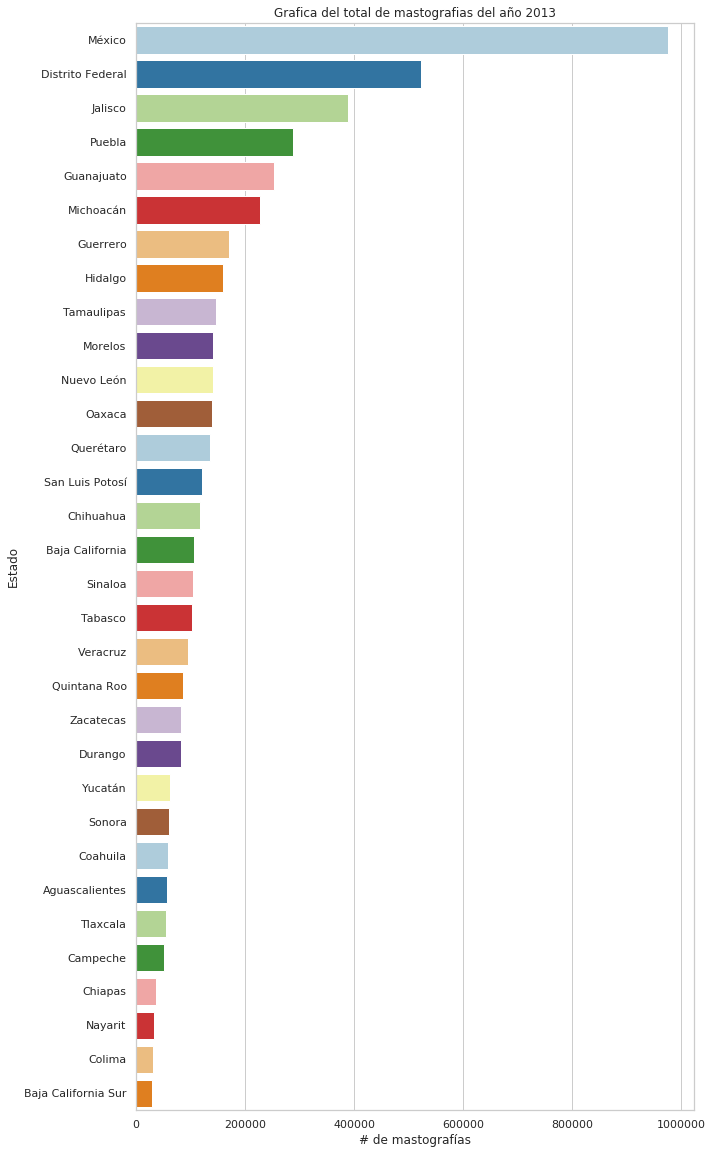

In [33]:
# ahora presenta una gráfica de barras para saber que estado es el que tiene el mayor núemero de pruebas
masto_gp = masto.groupby("estado")["count"].sum()
masto_gp = masto_gp.to_frame()
masto_gp = masto_gp.reset_index()
masto_gp = masto_gp.sort_values(by="count", ascending=False)
fig = plt.figure(figsize=(10,20))
ax = sns.barplot(data=masto_gp, x="count", y="estado", orient='h',  palette="Paired" )
ax.set_title('Grafica del total de mastografias del año 2013')
ax.set(xlabel='# de mastografías', ylabel='Estado');

Podemos observar que se encuentra un gran número de mastografías en el Estado de México y en el Distrito Federal, y a partir de ahí van descendiendo el número de mastografías realizadas, presenta lógica teniendo en cuenta que disminuye de acuerdo a la densidad poblacional de cada estado.

Ahora vamos a anáizar dos resultados que son importantes, los tumores que fueron detectados como benignos, y aquellos que presentan una alta suguestiva a malignidad.

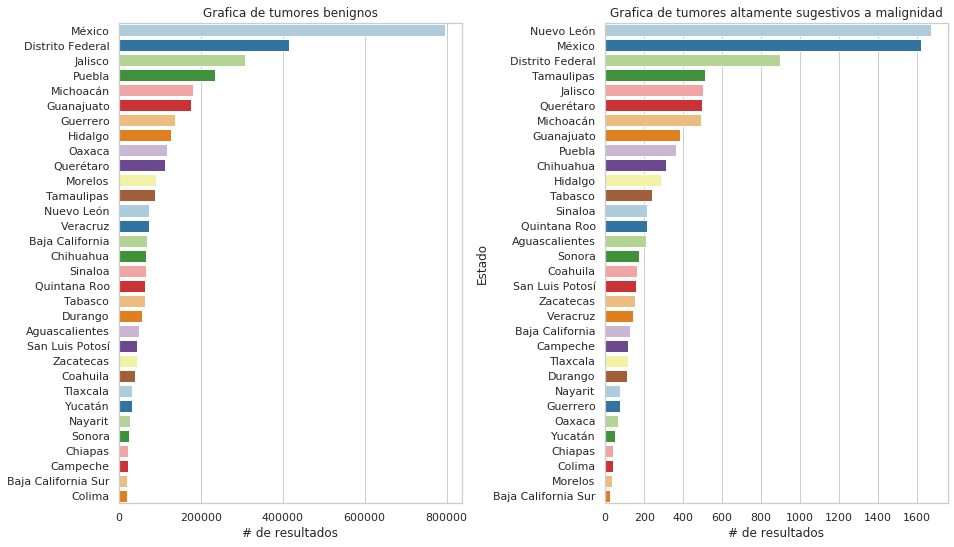

In [49]:
# analizamos usando una grafica de barras

masto_agre = masto[masto['resultado'] == 'Altamente Sugestiva a Malignidad']
masto_agre = masto_agre.groupby('estado').sum()
masto_agre = masto_agre.reset_index()
masto_agre = masto_agre.sort_values(by='count', ascending=False)

masto_beni = masto[masto['resultado'] == 'Benigna']
masto_beni = masto_beni.groupby('estado').sum()
masto_beni = masto_beni.reset_index()
masto_beni = masto_beni.sort_values(by='count', ascending=False)

fig, axes = plt.subplots(1, 2, sharex=False, figsize=(15,10))

fig.tight_layout(pad=9)


sns.barplot(x='count', y='estado', data=masto_beni, orient='h', palette="Paired", ax=axes[0])
axes[0].set_title('Grafica de tumores benignos')
axes[0].set(xlabel='# de resultados', ylabel='')
axes[0].locator_params(axis='x', nbins=5);

sns.barplot(x='count', y='estado', data=masto_agre, orient='h', palette="Paired", ax=axes[1])
axes[1].set_title('Grafica de tumores altamente sugestivos a malignidad')
axes[1].set(xlabel='# de resultados', ylabel='Estado')
axes[1].locator_params(axis='x', nbins=10)


Observando de forma forma detenida los resultados del total de mastografías realizadas y los resultados como beningnos y altamente sugestivos a malignidad, podemos observar que el total de mastografías que dan como resultado tumores benignos en el estado de Nuevo León se encuentra muy por debajo de los otros estados en comparación con los resultados que tumores que presenta una alta sugestiva a malignidad, donde esta a la cabeza de todos.

Otra forma de ver observar estos cambios, y de mejor forma que usando la gráfica de barras, es mediante el uso de los **Mapas**, de los cuales vamos a presentar un mapa interactivo en el cual obtendremos 3 capas: el total de mastografías, el total con resultado benigno y el total con resultado altamente sugestivo a malignidad.

In [50]:
# Cambiamos el nombre de alguas columnas con el diccionario usado anteriormente para poder asociarlo al geojson
masto_gp = masto_gp.replace({'estado': renombre})
masto_agre = masto_agre.replace({'estado': renombre})
masto_beni = masto_beni.replace({'estado': renombre})

In [51]:
mymap =  folium.Map(location=[25, -100], zoom_start=4.5, width="100%", height='100%')

# Total de mastografías

folium.Choropleth(
    geo_data = mxn,
    name=f'Total de mastografías realizadas',
    data=masto_gp,
    columns=['estado', 'count'],
    key_on='feature.properties.estado',
    fill_color='YlGn',
    fill_opacity=1,
    line_opacity=0.2,
    legend_name=f'Total de mastografías realizadas (2013-2019)'
).add_to(mymap)

# Total con resultado benigno

folium.Choropleth(
    geo_data = mxn,
    name=f'Resultados mastografias: Benignas',
    data=masto_beni,
    columns=['estado', 'count'],
    key_on='feature.properties.estado',
    fill_color='YlGn',
    fill_opacity=1,
    line_opacity=0.2,
    legend_name=f'Resultados mastografias: Benignas (2013-2019)'
).add_to(mymap)

# Total con resultado altamente sugestivo a malignidad

folium.Choropleth(
    geo_data = mxn,
    name=f'Resultados mastografias: Altamente Sugestiva a Malignidad',
    data=masto_agre,
    columns=['estado', 'count'],
    key_on='feature.properties.estado',
    fill_color='YlGn',
    fill_opacity=1,
    line_opacity=0.2,
    legend_name=f'Resultados mastografias: Altamente Sugestiva a Malignidad (2013-2019)'
).add_to(mymap)


folium.LayerControl().add_to(mymap)

mymap

De forma más clara podemos observar que los dos estados más número de mastografías y con mayor número de resultado benigno se presentan en el Estado de México y en el Distrito Federal, y al apagar o encender sus capas el cambio de coloraciones es imperceptible. Sin embargo, al sobre poner la capa de resultados altamente sugestivos a malignidad claramente hay un cambio pues el estado de Nuevo León resalta de los demás, por esta razón, en ocasiones los mapas suelen ser más comunicativos a la hora de graficar algunos resultados.

#### Cambios en el número de mastografías con respecto a cada año

Ahora analizaremos si se han realizado más o menos estudios a lo largo del tiempo.

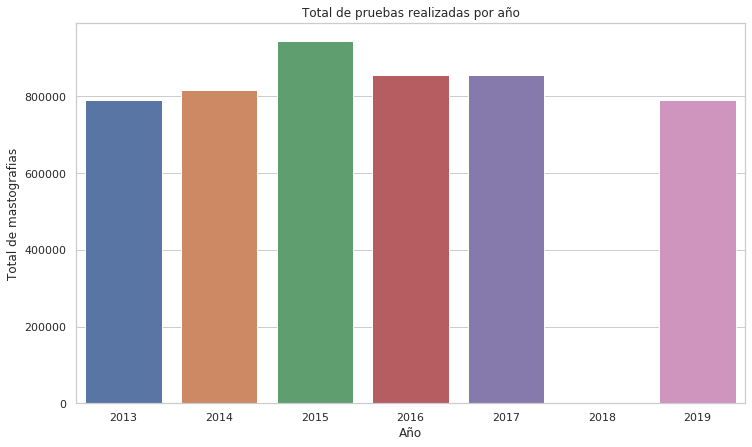

In [52]:
# realiamos un DS con el total por año
conteo = {'Año': list(range(2013, 2020)), 
          'Numero de pruebas': [sicam13_estado['count'].sum(), sicam14_estado['count'].sum(), 
                                sicam15_estado['count'].sum(), sicam16_estado['count'].sum(),
                                sicam17_estado['count'].sum(), np.nan, sicam19_estado['count'].sum()]}
conteo = pd.DataFrame(conteo)


fig = plt.figure(figsize=(12,7))
ax = sns.barplot(x='Año', y='Numero de pruebas', data=conteo)
ax.set_title('Total de pruebas realizadas por año')
ax.set(ylabel='Total de mastografias');

La grafica nos muestra que existia un aumento en el numero de mastografías aplicadas, pero a partir del 2015 pareciera que estos estudios empezaron a disminuir. Una posible respuesta al porque han disminuido el número de pruebas sería analizar el gasto público usado y si este esta relacionado con esta disminución.

#### Edades con mayor número de mastografías

La otra pregunta que nos hacemos es la edades en las cuales las mujeres se realizan mastografías, para eso es necesario importar nuestros DS que se han limpiado previamente.

In [53]:
# Cargamos los dataset
sicam13_edad = pd.read_csv("../Equipo_2_P2_Analisis/DATA_CLEAN/SICAM/masto_2013_SICAM_edad.csv", index_col=0)
sicam14_edad = pd.read_csv("../Equipo_2_P2_Analisis/DATA_CLEAN/SICAM/masto_2014_SICAM_edad.csv", index_col=0)
sicam15_edad = pd.read_csv("../Equipo_2_P2_Analisis/DATA_CLEAN/SICAM/masto_2015_SICAM_edad.csv", index_col=0)
sicam16_edad = pd.read_csv("../Equipo_2_P2_Analisis/DATA_CLEAN/SICAM/masto_2016_SICAM_edad.csv", index_col=0)
sicam17_edad = pd.read_csv("../Equipo_2_P2_Analisis/DATA_CLEAN/SICAM/masto_2017_SICAM_edad.csv", index_col=0)
sicam19_edad = pd.read_csv("../Equipo_2_P2_Analisis/DATA_CLEAN/SICAM/masto_2019_SICAM_edad.csv", index_col=0)

# Juntamos los datos
sicam_edad = sicam13_edad.append([sicam14_edad,sicam15_edad,sicam16_edad,sicam17_edad,sicam19_edad])

sicam_edad_group = sicam_edad.groupby(["resultado", "edad"])["count"].sum()
sicam_edad_group = sicam_edad_group.reset_index()
sicam_edad_group["edad"] = pd.to_numeric(sicam_edad_group["edad"], downcast="integer")

In [54]:
# Haceos una lista para el loop de las barras cumulativas
res = pd.unique(sicam_edad_group["resultado"])

# Una lista con varios colores para la paleta
col_pl = ["C0", "C1", "C2", "deepskyblue", "c", "darkorange", "firebrick", "ivory", "k"]

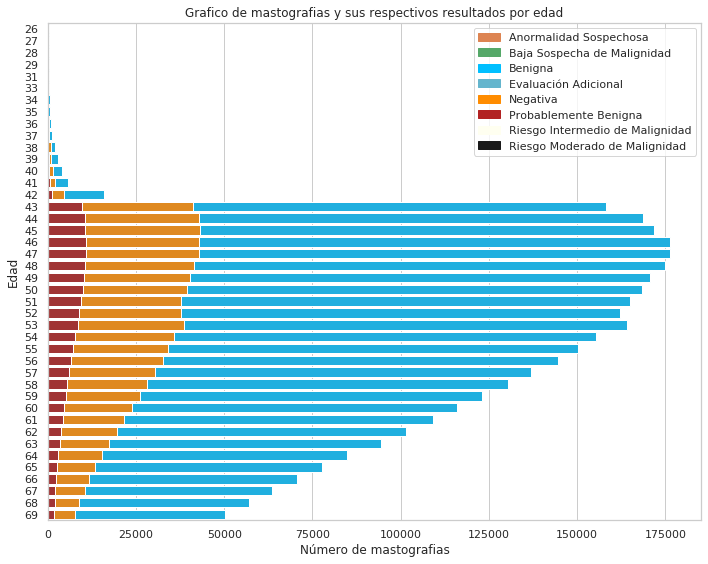

In [55]:
# realizamos la figura de acuerdo el tipo de resultado y las edades

fig, ax = plt.subplots(figsize=(10,8))

leg = []
for i in range(1, len(res)):
    sicam_edad_fil = sicam_edad_group[sicam_edad_group['resultado'] == res[i]]
    sns.barplot(x='count', y='edad', orient="h", data=sicam_edad_fil, color=col_pl[i])
    leg.append(mpatches.Patch(color=col_pl[i], label=res[i]))

ax.set_xlabel('Número de mastografias')
ax.set_title('Grafico de mastografias y sus respectivos resultados por edad')
ax.set_ylabel('Edad')
ax.legend(handles=leg)
plt.tight_layout()

plt.show()

En esta ultima gráfica podemos observar que después de los 43 años, existe un aumento muy considerable en los estudios de mastografías, y de igual forma, los resultados nos indican que podemos tener una mayor incidencia de tumores en las mujeres. 

Ahora presentaremos un rango de edades que presenten un mayor y menor cantidad de resultados benignos y con alta incidencia a malignidad.

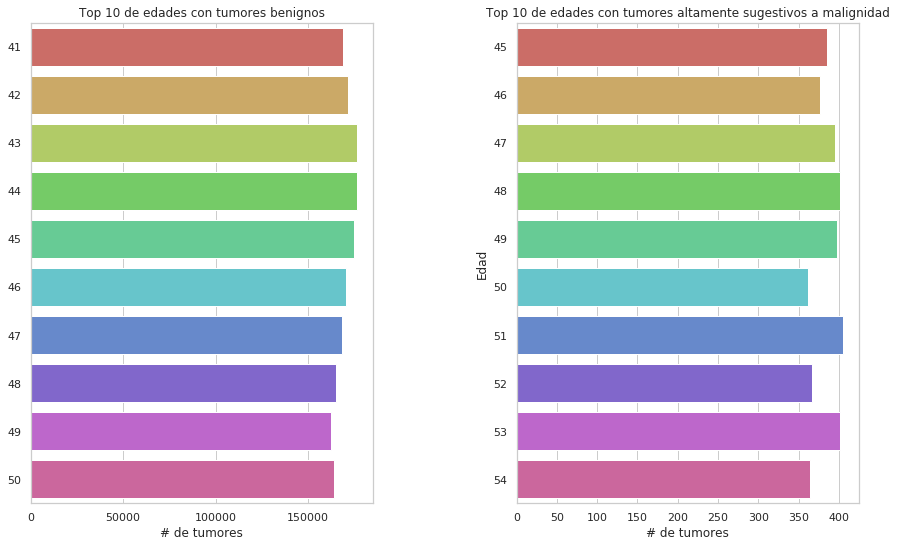

In [56]:
# Analizaremos cuales son las edades que presentan una mayor y menor cantidad de resultados benignos
# de acuerdo a la edad.

edad_top10_ben = sicam_edad_group[sicam_edad_group["resultado"] == "Benigna"].sort_values(by="count",ascending =False).head(10)

edad_top10_mal = sicam_edad_group[sicam_edad_group["resultado"] == "Altamente Sugestiva a Malignidad"].sort_values(by="count",ascending =False).head(10)

fig, axes = plt.subplots(1, 2, sharex=False, figsize=(15,10))

fig.tight_layout(pad=9)

sns.barplot(x='count', y='edad', data=edad_top10_ben, orient='h', palette="hls", ax=axes[0])
axes[0].set_title('Top 10 de edades con tumores benignos')
axes[0].set(xlabel='# de tumores', ylabel='')
axes[0].locator_params(axis='x', nbins=5)

sns.barplot(x='count', y='edad', data=edad_top10_mal, orient='h', palette="hls", ax=axes[1])
axes[1].set_title('Top 10 de edades con tumores altamente sugestivos a malignidad')
axes[1].set(xlabel='# de tumores', ylabel='Edad')
axes[1].locator_params(axis='x', nbins=10);

A partir de esta grafica de barras podemos notar que a partir de los 41 años es la edad en la cual se presenta mayor cantidad de tumores benignos y a partir de los 45 años es cuando aparecen los tumores con alta incidencia a malignidad.

De la misma manera podemos ver cuales son las edades que presentan menor numero de resultados con tumores altamente sugestivos a malignidad y benignos.

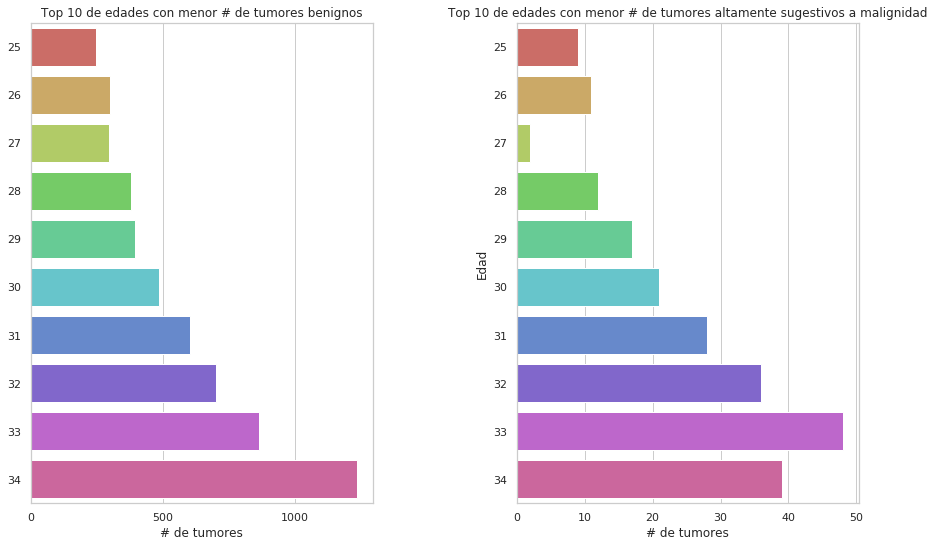

In [57]:
edad_less10_ben = sicam_edad_group[sicam_edad_group["resultado"] == "Benigna"].sort_values(by="count",ascending =False).tail(10)

edad_less10_mal = sicam_edad_group[sicam_edad_group["resultado"] == "Altamente Sugestiva a Malignidad"].sort_values(by="count",ascending =False).tail(10)

fig, axes = plt.subplots(1, 2, sharex=False, figsize=(15,10))
fig.tight_layout(pad=9)

sns.barplot(x='count', y='edad', data=edad_less10_ben, orient='h', palette="hls", ax=axes[0])
axes[0].set_title('Top 10 de edades con menor # de tumores benignos')
axes[0].set(xlabel='# de tumores', ylabel='')
axes[0].locator_params(axis='x', nbins=5)

sns.barplot(x='count', y='edad', data=edad_less10_mal, orient='h', palette="hls", ax=axes[1])
axes[1].set_title('Top 10 de edades con menor # de tumores altamente sugestivos a malignidad')
axes[1].set(xlabel='# de tumores', ylabel='Edad')
axes[1].locator_params(axis='x', nbins=10);

A partir de las gráficas presentadas anteriormente, es posible concluir que a mayor edad mayor es el número de tumores, sin embargo, debemos tener cuidado porque el número de pruebas en edades temprana también mucho menor, como lo presenta el gráfico de las edades.

## Ahora analizaremos los datos de morbilidad en México

Haremos énfasis en la incidencia de cáncer de mama por estado, para los años dispoibles en los DS previamente lipiados.

In [58]:
morbi2013 = pd.read_csv("../Equipo_2_P2_Analisis/DATA_CLEAN/Morbilidad_2013_2019_clean/morbilidad_2013_clean.csv", index_col=0)
morbi2013.head()

,estado,< 1,1 - 4,5 - 9,10 - 14,15 - 19,20 - 24,25 - 44,45 - 49,50 - 59,60 - 64,65 y +,incidencia
0,Campeche,0.0,0.0,0.0,0.00,0.00,0.00,58.10,264.16,258.38,342.79,191.92,76.25
1,Aguascalientes,0.0,0.0,0.0,0.00,0.00,3.43,21.42,110.68,108.21,164.13,115.95,33.04
2,Jalisco,0.0,0.0,0.0,0.28,1.12,1.99,27.16,110.88,89.91,141.10,72.41,32.39
3,Veracruz,0.0,0.0,0.0,0.00,2.68,5.67,25.41,69.23,90.19,96.98,66.66,29.85
4,San Luis Potosí,0.0,0.0,0.0,0.00,0.00,0.81,28.29,88.65,103.23,101.62,46.06,28.31


Para tener un control, realizaremos un group_by para sacar el numero de mastografías, por cada año y juntarlo en un data set

In [60]:
# cargamos los datos de morbilidad
morbi2014 = pd.read_csv("../Equipo_2_P2_Analisis/DATA_CLEAN/Morbilidad_2013_2019_clean/morbilidad_2014_clean.csv", index_col=0)
morbi2015 = pd.read_csv("../Equipo_2_P2_Analisis/DATA_CLEAN/Morbilidad_2013_2019_clean/morbilidad_2015_clean.csv", index_col=0)
morbi2016 = pd.read_csv("../Equipo_2_P2_Analisis/DATA_CLEAN/Morbilidad_2013_2019_clean/morbilidad_2016_clean.csv", index_col=0)
morbi2017 = pd.read_csv("../Equipo_2_P2_Analisis/DATA_CLEAN/Morbilidad_2013_2019_clean/morbilidad_2017_clean.csv", index_col=0)
morbi2018 = pd.read_csv("../Equipo_2_P2_Analisis/DATA_CLEAN/Morbilidad_2013_2019_clean/morbilidad_2018_clean.csv", index_col=0)
morbi2019 = pd.read_csv("../Equipo_2_P2_Analisis/DATA_CLEAN/Morbilidad_2013_2019_clean/morbilidad_2019_clean.csv", index_col=0)

In [61]:
# Se hace un DS con todos los datos 
morbi = morbi2013.append([morbi2014, morbi2015, morbi2016, morbi2017, morbi2018, morbi2019])

count    231.000000
mean      26.553680
std       19.513438
min        3.650000
25%       13.455000
50%       22.870000
75%       31.655000
max      134.350000
Name: incidencia, dtype: float64


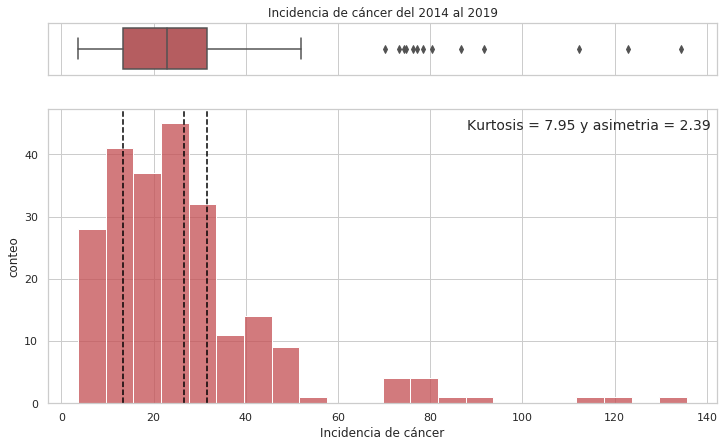

In [81]:
# Analizamos el histograma y sus valores de kurtosis y asimetria

kur_mor = kurtosis(morbi["incidencia"])
asi_mor = skew(morbi["incidencia"])

# imprimimos el describe con los valores estadisticos
inci_des = morbi["incidencia"].describe()
print(inci_des)


# Parametros de la figura
fig, (ax_box, ax_hist) = plt.subplots(2,sharex=True, gridspec_kw={"height_ratios": (0.15, 0.85)}, figsize=(12,7))

                                     
# Graficos
sns.boxplot(data=morbi, x="incidencia", ax=ax_box, color="r")
sns.histplot(data=morbi, x="incidencia", binwidth=6, ax=ax_hist, color="r")

# Lineas
ax_hist.axvline(inci_des[inci_des.index.get_loc("mean")],color='black',ls='--')
ax_hist.axvline(inci_des[inci_des.index.get_loc("25%")],color='black',ls='--')
ax_hist.axvline(inci_des[inci_des.index.get_loc("75%")],color='black',ls='--')

# Labels de las graficas
ax_box.set_title('Incidencia de cáncer del 2014 al 2019')
ax_box.set(xlabel="")
ax_hist.text(88, 44, f'Kurtosis = {round(kur_mor, 2)} y asimetria = {round(asi_mor,2)}', fontsize=14)
ax_hist.set(ylabel='conteo', xlabel="Incidencia de cáncer");




A partir del histograma y los valores de Curtosis y Asimetría podemos observar que la distribucion de la incidencia es asimetria positiva leptocúrtica. Esto se puede ver muy claramente en la grafica de Boxplot donde se ven valores de outliers que pueden ser los causantes del sesgo que encontramos en los datos.

### Ahora analizaremos si existe una relación entre el número de mastografías y la incidencia por estado. 

In [82]:
# hacemos la agrupacion y obtenemos los valores promedio de la incidencia
morbi_estado = morbi.groupby("estado")["incidencia"].mean()
morbi_estado = morbi_estado.to_frame()
morbi_estado = morbi_estado.reset_index()
morbi_estado = morbi_estado.drop(26)

# Tenemos que hacer un rename de la ciudad de México a Distrito Federal para asociar a nuestro geojson
morbi_estado = morbi_estado.replace({"estado": renombre})

In [85]:
# creamos un mapa de incidencia promedio para los años 2014-2016

mymap =  folium.Map(location=[25, -100], zoom_start=4.5, width="100%", height='100%')

folium.Choropleth(
    geo_data = mxn,
    name=f'Incidencia de cáncer',
    data=morbi_estado,
    columns=['estado', 'incidencia'],
    key_on='feature.properties.estado',
    fill_color='YlGn',
    fill_opacity=1,
    line_opacity=0.2,
    legend_name=f'Incidecia de cáncer promedio'
).add_to(mymap)



folium.LayerControl().add_to(mymap)

mymap

In [86]:
# Generamos un DS con el promedio de los datos de mastografias
masto_estado = masto.groupby("estado")['count'].mean()
masto_estado = masto_estado.to_frame()
masto_estado = masto_estado.reset_index()
masto_estado.head()

,estado,count
0,Aguascalientes,1170.265306
1,Baja California,2240.382979
2,Baja California Sur,818.722222
3,Campeche,1182.953488
4,Chiapas,883.000000


In [87]:
# ahora hacemos un merge con el DS de incidencia de cáncer
morbi_masto = morbi_estado.merge(masto_estado)
morbi_masto.head()

,estado,incidencia,count
0,Aguascalientes,70.047143,1170.265306
1,Baja California,27.981429,2240.382979
2,Baja California Sur,25.018571,818.722222
3,Campeche,95.078571,1182.953488
4,Chiapas,15.611429,883.000000


In [88]:
# Ahora realizaremos la regresion lineal
lr = LinearRegression()

# Y obtenemos nuestros datos de prueba y entrenamiento
X = morbi_masto["count"].to_frame()
Y = morbi_masto["incidencia"]


In [89]:
lr.fit(X, Y)

LinearRegression()

In [90]:
y_predict = lr.predict(X)
y_predict

array([29.00464818, 27.8767755 , 29.37516429, 28.99127521, 29.3074174 ,
       27.68105277, 18.77458312, 28.85658143, 29.5000545 , 28.31689573,
       24.5642577 , 26.17633392, 26.73682676, 21.7170717 , 25.24040794,
       26.99812176,  8.82964491, 29.40142155, 27.13349303, 27.18900215,
       23.91787232, 26.77840184, 28.306661  , 27.49071559, 27.81733704,
       28.70946468, 27.95192137, 26.71503272, 28.94733416, 28.00398354,
       28.61688214, 28.33764979])

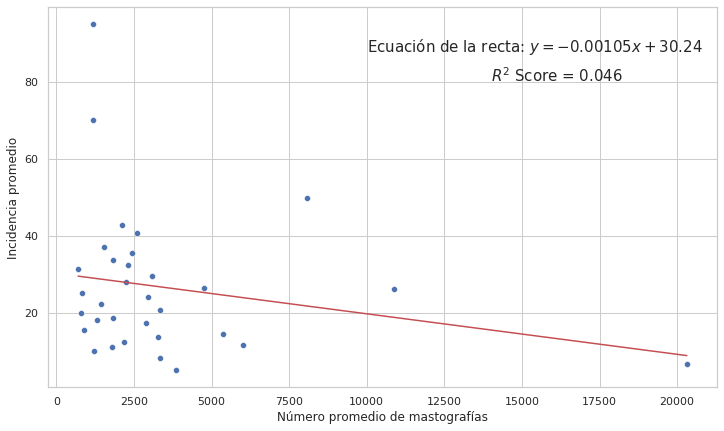

In [91]:
# obtenemos el slope y el itercept
inter = round(lr.intercept_, 2)
slp = round(lr.coef_[0], 5)
r2 = round(metrics.r2_score(Y, y_predict), 3)

fig = plt.figure(figsize=(12,7))
ax = sns.scatterplot(x=X["count"], y=Y, color='b')
ax = sns.lineplot(x=X["count"], y=y_predict, color='r')
ax.text(10000, 88, r'Ecuación de la recta: $y = {{{0}}}x + {{{1}}}$'.format(slp,inter), fontsize=15)
ax.text(14000, 80, r'$R^2$ Score = ${{{0}}}$'.format(r2), fontsize=15)
ax.set(ylabel='Incidencia promedio', xlabel="Número promedio de mastografías");

A partir del análisis de regresió lineal simple podemos observar que los diferentes estados en México no encuentran una relación entre la incidencia de cáncer. Sin embargo, hay que considerar que aquí se tienen todos los datos, y como vimos, la aparición de muchos tumores altamente sugestivos a malignidad en el estado de Nuevo León podría ser un factor a considerarse, entonces, filtraremos los datos de mastografías con tumores altamente sugestivos a malignidad y veamos que sucede.

In [92]:
# Generamos un DS con el total de los datos de mastografias
masto_estado = masto[masto["resultado"] == "Altamente Sugestiva a Malignidad"].groupby("estado")['count'].mean()
masto_estado = masto_estado.to_frame()
masto_estado = masto_estado.reset_index()
masto_estado.head()

,estado,count
0,Aguascalientes,35.166667
1,Baja California,21.166667
2,Baja California Sur,5.200000
3,Campeche,19.666667
4,Chiapas,8.200000


In [93]:
# ahora hacemos un merge con el DS de incidencia de cáncer
morbi_masto = morbi_estado.merge(masto_estado)
morbi_masto.head()

,estado,incidencia,count
0,Aguascalientes,70.047143,35.166667
1,Baja California,27.981429,21.166667
2,Baja California Sur,25.018571,5.200000
3,Campeche,95.078571,19.666667
4,Chiapas,15.611429,8.200000


In [94]:
# Ahora realizaremos la regresion lineal
lr = LinearRegression()

# Y obtenemos nuestros datos de prueba y entrenamiento
X = morbi_masto["count"].to_frame()
Y = morbi_masto["incidencia"]


In [95]:
lr.fit(X, Y)

LinearRegression()

In [96]:
y_predict = lr.predict(X)
y_predict

array([27.48127231, 28.13472191, 28.87996562, 28.20473437, 28.73994071,
       26.68779779, 22.14476724, 27.83911376, 28.82706732, 28.23585102,
       26.15103562, 28.53923833, 26.91339349, 25.22531535, 25.28754865,
       28.77728068, 16.51265401, 28.51590084, 16.11591675, 28.62480911,
       26.2988397 , 25.26421116, 27.47349315, 27.89356789, 27.46571399,
       27.7691013 , 27.24789745, 25.13196541, 28.22029269, 28.01025532,
       28.72593822, 27.92468454])

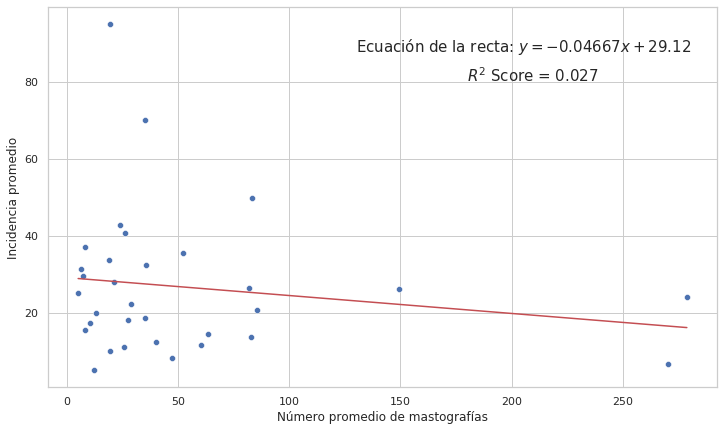

In [97]:
# obtenemos el slope y el itercept
inter = round(lr.intercept_, 2)
slp = round(lr.coef_[0], 5)
r2 = round(metrics.r2_score(Y, y_predict), 3)

fig = plt.figure(figsize=(12,7))
ax = sns.scatterplot(x=X["count"], y=Y, color='b')
ax = sns.lineplot(x=X["count"], y=y_predict, color='r')
ax.text(130, 88, r'Ecuación de la recta: $y = {{{0}}}x + {{{1}}}$'.format(slp,inter), fontsize=15)
ax.text(180, 80, r'$R^2$ Score = ${{{0}}}$'.format(r2), fontsize=15)
ax.set(ylabel='Incidencia promedio', xlabel="Número promedio de mastografías");

Con este resultado observamos que no existen ninguna relación entre la incidencia de cáncer y el número de mastografías que presentan un "Altamente Sugestiva a Malignidad", por lo que estas variables son independientes, es decir, el número de pruebas no va a arrojar nuevos valores de incidencia.

Esto se puede ver claramente pues si observamos los mapas del total de resultados por estado ninguno tiene coloraciones verde obscuro donde las coloraciones verde oscuro se presentan en la incidencia.


##### Finalmente vamos a ver que tanto aumento hay en la incidencia a lo largo de los años

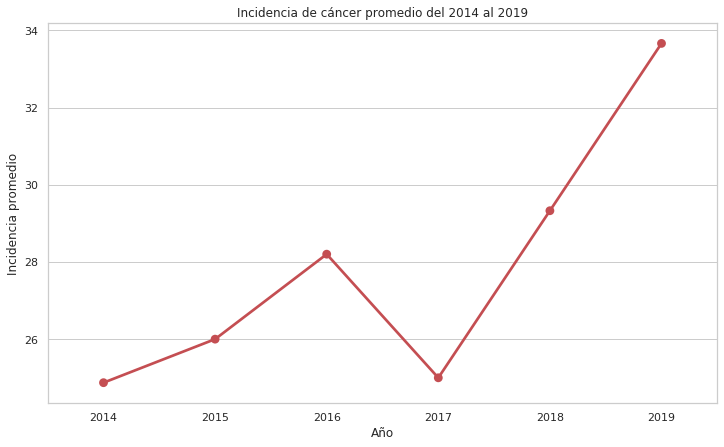

In [98]:
# Hacemos una lista con las variables
morbi_ls = [morbi2014,morbi2015,morbi2016,morbi2017,morbi2018,morbi2019]

#analizamos en el tiempo los datos de morbilidad, si existe un aumento
avg_year = []

for i in range(0, len(morbi_ls)):
    f = morbi_ls[i]["incidencia"].mean()
    avg_year.append(f)
avg_year
avg_year = {'Año': list(range(2014, 2020)), 
          'Incidencia promedio': avg_year }

avg_year = pd.DataFrame(avg_year)


fig = plt.figure(figsize=(12,7))
ax = sns.pointplot(x='Año', y='Incidencia promedio', data=avg_year, color="r")
ax.set_title('Incidencia de cáncer promedio del 2014 al 2019')
ax.set(ylabel='Incidencia promedio');


Observamos que existe un claro aumento en la incidencia de cáncer de mama, aunque en el año 2017 disminuyo, para los siguientes años aumento de forma preocupante.

## ***A lo largo del tiempo se han disminuido un poco el número total de mastografías realizadas, y la incidencia de cáncer ha aumentado con los años, además de no encontrarse una relación estrecha entre el número de mastografías realizadas y la incidencia en el cáncer de mama, respondiendo así la pregunta 1***